<a href="https://colab.research.google.com/github/SwapnilRaj17/SOIL_QUALITY_PREDICTION/blob/main/SOIL_QUALITY_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the dataset
df = pd.read_csv("crop.csv")
df.head()

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link,Fertilizer_Usage
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo,68.86
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo,88.52
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo,84.69
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo,83.16
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo,71.15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   District_Name     4513 non-null   object 
 1   Soil_color        4513 non-null   object 
 2   Nitrogen          4513 non-null   int64  
 3   Phosphorus        4513 non-null   int64  
 4   Potassium         4513 non-null   int64  
 5   pH                4513 non-null   float64
 6   Rainfall          4513 non-null   int64  
 7   Temperature       4513 non-null   int64  
 8   Crop              4513 non-null   object 
 9   Fertilizer        4513 non-null   object 
 10  Link              4513 non-null   object 
 11  Fertilizer_Usage  4513 non-null   float64
dtypes: float64(2), int64(5), object(5)
memory usage: 423.2+ KB


In [4]:
df.describe()

,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Fertilizer_Usage
count,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000
mean,95.409927,54.341901,63.595170,6.715267,819.189010,25.915134,76.587407
std,38.060648,16.551991,35.691911,0.625198,251.730813,5.897328,29.228860
min,20.000000,10.000000,5.000000,5.500000,300.000000,10.000000,13.440000
25%,60.000000,40.000000,40.000000,6.000000,600.000000,20.000000,53.780000
50%,105.000000,55.000000,55.000000,6.500000,800.000000,25.000000,78.470000
75%,125.000000,65.000000,75.000000,7.000000,1000.000000,30.000000,98.020000
max,150.000000,90.000000,150.000000,8.500000,1700.000000,40.000000,150.970000


In [5]:
df.isnull().sum()

,0
District_Name,0
Soil_color,0
Nitrogen,0
Phosphorus,0
Potassium,0
pH,0
Rainfall,0
Temperature,0
Crop,0
Fertilizer,0


[]

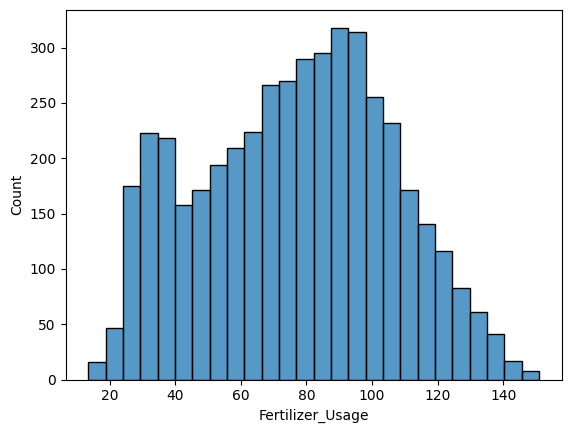

In [6]:
sns.histplot(df["Fertilizer_Usage"])
plt.plot()

In [7]:
df.drop(columns=["Link"], inplace=True)
df.head()

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Fertilizer_Usage
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea,68.86
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea,88.52
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea,84.69
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea,83.16
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea,71.15


In [14]:
# perform label encoding:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in ["District_Name", "Soil_color", "Crop", "Fertilizer"]:
 df[i]=le.fit_transform(df[i])
df.head()

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Fertilizer_Usage
0,0,0,75,50,100,6.5,1000,20,11,17,68.86
1,0,0,80,50,100,6.5,1000,20,11,17,88.52
2,0,0,85,50,100,6.5,1000,20,11,17,84.69
3,0,0,90,50,100,6.5,1000,20,11,17,83.16
4,0,0,95,50,100,6.5,1000,20,11,17,71.15


In [24]:
# split features and target variable
x=df.drop(columns=["Fertilizer_Usage"])
y=df["Fertilizer_Usage"]

In [25]:
# split the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
# build the Linear Regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
# predict the xtest and store it into ypred
ypred=lr.predict(x_test)

In [28]:
# check the mae,mse and r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test, ypred)
mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)


# Print results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Absolute Error: 7.788929785877768
Mean Squared Error: 90.78530598546524
R-squared Score: 0.8896645000566501
